## Лабораторная работа 3
## Фильтры
## Котов И. Ю.
## РИМ-181226

In [8]:
import numpy as np
from skimage.io import imread, imshow
from skimage.color import rgb2gray
from skimage import img_as_ubyte
from scipy.signal import convolve2d
import matplotlib.pyplot as plt
from skimage.transform.integral import integral_image
%matplotlib inline

## Свертка

In [2]:
image = np.array([[0, -8, -3, -2], 
                [1, 9, -8, 0], 
                [9, -4, 5, -9], 
                [6, -4, 6, 3]])

kernel = np.array([[4, -5, 4], 
                   [-6, -8, -2], 
                   [1, 5, 5]])

print(convolve2d(kernel, image, mode='valid'))

[[  7 -88]
 [ 94  -7]]


## box-фильтр

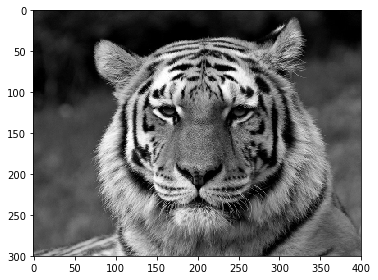

In [4]:
img = imread('C:\\Users\\Vanya\\Desktop\\2 семестр\\Анализ изображений\\images\\tiger-gray-small.png')
imshow(img)

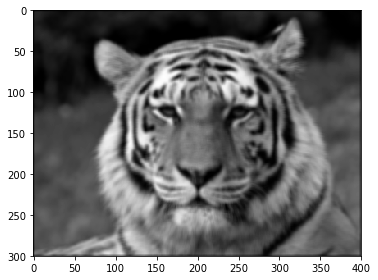

In [11]:
def adjustEdges(height, width, point):

    newPoint = [point[0], point[1]]
    if point[0] >= height:
        newPoint[0] = height -1

    if point[1] >= width:
        newPoint[1] = width -1
    return tuple(newPoint)

def findArea(int_img, a, b, c, d):
    height = int_img.shape[0]
    width = int_img.shape[1]
    a = adjustEdges(height, width, a)
    b = adjustEdges(height, width, b)
    c = adjustEdges(height, width, c)
    d = adjustEdges(height, width, d)

    a = 0 if (a[0] < 0 or a[0] >= height) or (a[1] < 0 or a[1] >= width) else int_img.item(a[0], a[1])
    b = 0 if (b[0] < 0 or b[0] >= height) or (b[1] < 0 or b[1] >= width) else int_img.item(b[0], b[1])
    c = 0 if (c[0] < 0 or c[0] >= height) or (c[1] < 0 or c[1] >= width) else int_img.item(c[0], c[1])
    d = 0 if (d[0] < 0 or d[0] >= height) or (d[1] < 0 or d[1] >= width) else int_img.item(d[0], d[1])

    return a + d - b - c

def boxFilter(img, filterSize):

    height = img.shape[0]
    width = img.shape[1]
    intImg = integral_image(img)
    finalImg = np.ones((height, width), np.uint64)
    loc = int(filterSize/2)
    
    for y in range(height):
        for x in range(width):
            finalImg.itemset((y, x), findArea(intImg, (y-loc-1, x-loc-1), (y-loc-1, x+loc), (y+loc, x-loc-1), (y+loc, x+loc))/(filterSize**2))
    return finalImg

imshow(boxFilter(img, 5).astype('uint8'))

## Гауссовская фильтрация

In [22]:
# функция
def gauss(sigma, x, y): 
    return np.exp((-x**2-y**2)/(2*sigma**2))/(2*np.pi*sigma**2)

# ядро

def gauss_core(sigma=0.33):

    sigma = float(sigma)
    size = int(round(sigma*6)+1)
    m,n = [(ss-1.)/2. for ss in (size,size)]
    y,x = np.ogrid[-m:m+1,-n:n+1]
    h = np.exp( -(x*x + y*y) / (2.*sigma*sigma) )
    h[ h < np.finfo(h.dtype).eps*h.max() ] = 0
    sumh = h.sum()
    if sumh != 0:
        h /= sumh
    return np.around(h,decimals=10)

In [16]:
gauss(1, 1, 1)

0.058549831524319168

In [23]:
gauss_core()

array([[  9.87532000e-05,   9.73995860e-03,   9.87532000e-05],
       [  9.73995860e-03,   9.60645153e-01,   9.73995860e-03],
       [  9.87532000e-05,   9.73995860e-03,   9.87532000e-05]])

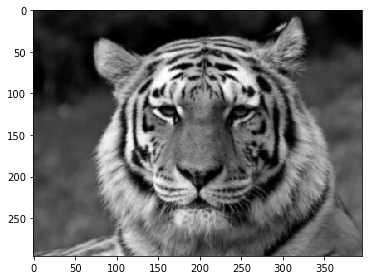

In [24]:
# фильтрация

G = np.matrix(matlab_style_gauss2D(0.66)) 
m = G.shape[0]-1 
n = G.shape[1]-1 
img_g = np.clip(convolve2d(img/255, G), 0, 1) 
img_g = np.floor(img_g * 255) 
img_g = img_g.astype('uint8')[m:-m, n:-n]
imshow(img_g)

## Повышение резкости изображения

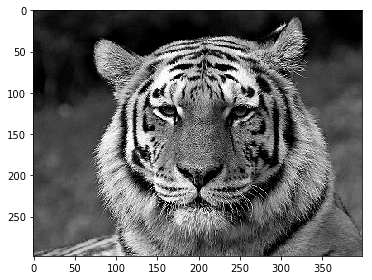

In [25]:
G = np.matrix(np.array([[-1,-2,-1],[-2,22,-2],[-1,-2,-1]])*1/10)
m = G.shape[0]-1 
n = G.shape[1]-1 
img_g = np.clip(convolve2d(img/255, G), 0, 1) 
img_g = np.floor(img_g * 255) 
img_g = img_g.astype('uint8')[m:-m, n:-n]
imshow(img_g)

## Медианный фильтр

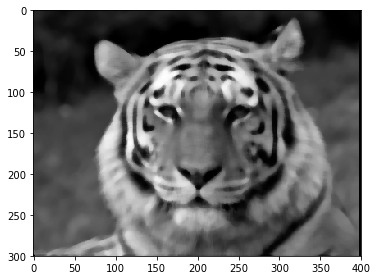

In [27]:
def median_filter(data, filter_size):
    
    temp = []
    indexer = filter_size // 2
    data_final = []
    data_final = np.zeros((len(data),len(data[0])))
    for i in range(len(data)):

        for j in range(len(data[0])):

            for z in range(filter_size):
                if i + z - indexer < 0 or i + z - indexer > len(data) - 1:
                    for c in range(filter_size):
                        temp.append(0)
                else:
                    if j + z - indexer < 0 or j + indexer > len(data[0]) - 1:
                        temp.append(0)
                    else:
                        for k in range(filter_size):
                            temp.append(data[i + z - indexer][j + k - indexer])

            temp.sort()
            data_final[i][j] = temp[len(temp) // 2]
            temp = []
            
    return data_final

imshow(median_filter(img,7).astype('uint8'))